# Lab 1 Part I: MNIST 2D CNN

## Imports

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Activation, AveragePooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.activations import softmax

## Dataset Upload and Extraction

This section of the code allows you to upload a ZIP file containing a dataset from your local computer and extract its contents to a specified directory in Google Colab.

1. **Upload the ZIP file**:
    - Use Google Colab's file upload functionality to select and upload a ZIP file.

    ```python
    from google.colab import files

    # Téléchargez le fichier ZIP
    uploaded = files.upload()
    ```

2. **Extract the ZIP file**:
    - Retrieve the name of the uploaded ZIP file.
    - Extract the contents of the ZIP file to a designated directory.

    ```python
    import zipfile
    import os

    zip_filename = next(iter(uploaded))  # Obtenez le nom du fichier téléchargé

    # Extrayez le fichier ZIP
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall("/content/digits")
    ```

3. **Specify and display the extraction path**:
    - Define the path where the ZIP file contents have been extracted.
    - Print the path to confirm the location of the extracted files.

    ```python
    # Le chemin vers le dossier extrait
    folder_path = "/content/digits/digits"

    print("Fichiers extraits dans le dossier:", folder_path)
    ```

### Summary

This script simplifies the process of uploading and extracting a dataset stored as a ZIP file on your local machine. By running this code, you can easily prepare your dataset for further processing and analysis in Google Colab.


In [2]:
from google.colab import files
import zipfile
import os

# Téléchargez le fichier ZIP
uploaded = files.upload()

zip_filename = next(iter(uploaded))  # Obtenez le nom du fichier téléchargé

# Extrayez le fichier ZIP
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/digits")

# Le chemin vers le dossier extrait
folder_path = "/content/digits/digits"

print("Fichiers extraits dans le dossier:", folder_path)

Saving digits.zip to digits.zip
Fichiers extraits dans le dossier: /content/digits/digits


## Load and format MNIST dataset

In [3]:
from sklearn import model_selection
from pathlib import Path
import librosa
import copy
import matplotlib
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPool1D, Flatten, Dense, AvgPool1D, Activation
from keras.utils import get_file
from keras.activations import softmax
from keras.utils import to_categorical



## Preprocessing and Loading Images

This section of the code handles the preprocessing and loading of images from the dataset. The steps involved are as follows:

1. **Preprocessing**:
    - **Resize**: The image is resized to 25x25 pixels.
    - **Convert to Grayscale**: The image is converted to grayscale.
    - **Normalize**: The pixel values are normalized to a range of [0, 1].
    - **Apply Gaussian Filter**: A Gaussian blur is applied to reduce noise.
    - **Convert to 8 Bits**: The image is converted to 8-bit format for edge detection.
    - **Apply Canny Edge Detection**: The Canny edge detection algorithm is used to find edges in the image.
    - **Apply Threshold**: Otsu’s thresholding is applied to binarize the image.

   

2. **Loading and Labeling Images**:
    - **Load Images**: Images are loaded from directories named according to their labels (0-9).
    - **Apply Preprocessing**: The preprocessing function is applied to each image.
    - **Return Arrays**: The function returns arrays of images and corresponding labels.

   

3. **Preparing Data for Training**:
    - **Normalize Images**: Convert pixel values to [0, 1].
    - **Reshape Images**: Reshape images to include a channel dimension.
    - **One-Hot Encoding**: Convert labels to one-hot encoded format.
    - **Split Data**: Divide the data into training and testing sets.

    

4. **Display Example Image**:
    - **Visualization**: Show an example image from the training set along with its label.


### Summary

This script preprocesses and loads digit images from a dataset, applying various image processing techniques such as resizing, grayscale conversion, normalization, Gaussian filtering, edge detection, and thresholding. It then prepares the data for model training by normalizing, reshaping, one-hot encoding labels, and splitting the dataset into training and testing sets. Finally, it visualizes a sample image to verify preprocessing steps.


x_train shape: (15196, 25, 25, 1)
y_train shape: (15196, 10)
x_test shape: (3800, 25, 25, 1)
y_test shape: (3800, 10)


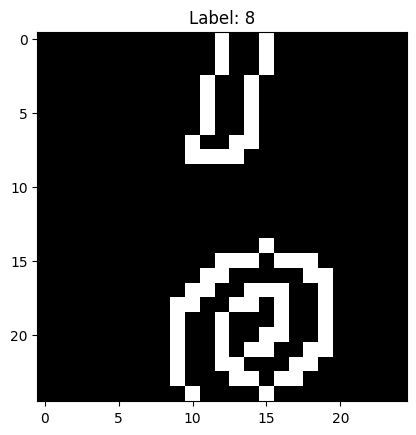

In [4]:
# Cellule pour le prétraitement et le chargement des images
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

def preprocess_image(img, img_size=(25, 25)):
    # Redimensionner l'image
    img = cv2.resize(img, img_size)

    # Conversion en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalisation
    normalized = gray / 255.0

    # Filtrage Gaussien
    blurred = cv2.GaussianBlur(normalized, (5, 5), 0)

    # Convertir en 8 bits pour Canny
    blurred_8u = np.uint8(blurred * 255)

    # Détection des contours
    edges = cv2.Canny(blurred_8u, threshold1=30, threshold2=100)

    # Binarisation
    _, thresholded = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    return thresholded

def load_digit_images(folder_path, img_size=(25, 25)):
    images = []
    labels = []
    for digit in range(10):
        digit_folder = os.path.join(folder_path, str(digit))
        if os.path.exists(digit_folder):
            for filename in os.listdir(digit_folder):
                if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
                    img_path = os.path.join(digit_folder, filename)
                    # Charger l'image
                    img = cv2.imread(img_path)

                    # Appliquer le prétraitement
                    img_processed = preprocess_image(img, img_size)
                    images.append(img_processed)
                    labels.append(digit)
    return np.array(images), np.array(labels)

# Charger les images de chiffres et les étiquettes
x_data, y_data = load_digit_images(folder_path, img_size=(25, 25))

# Normaliser les images
x_data = x_data.astype('float32') / 255.0

# Remodeler les images pour correspondre à la nouvelle taille
x_data = x_data.reshape((-1, 25, 25, 1))

# Convertir les étiquettes en encodage one-hot
y_data = to_categorical(y_data, 10)

# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=323)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Afficher une image d'exemple pour vérifier la résolution
plt.imshow(x_train[0].reshape(25, 25), cmap='gray')
plt.title(f'Label: {np.argmax(y_train[0])}')
plt.show()

## Build model

In [5]:
pip install pydot graphviz


## Description of the CNN Model Construction

This code constructs a Convolutional Neural Network (CNN) using TensorFlow and Keras. The steps involved in defining the model are as follows:

1. **Import necessary libraries**:
    ```python
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation
    from tensorflow.keras.utils import plot_model
    ```

2. **Define the model**:
    - **Input layer**: An input layer with the shape `(25, 25, 1)` is added to match the preprocessed images.
    - **First Convolutional Block**:
        - `Conv2D` layer with 64 filters and a kernel size of 3, followed by a ReLU activation function.
        - `BatchNormalization` layer to normalize the activations of the previous layer.
        - `MaxPooling2D` layer with a pool size of 2 to reduce the spatial dimensions.
    - **Second Convolutional Block**:
        - `Conv2D` layer with 128 filters and a kernel size of 3, followed by a ReLU activation function.
        - `BatchNormalization` layer to normalize the activations.
        - `MaxPooling2D` layer with a pool size of 2.
    - **Third Convolutional Block**:
        - `Conv2D` layer with 256 filters and a kernel size of 3, followed by a ReLU activation function.
        - `BatchNormalization` layer to normalize the activations.
        - `MaxPooling2D` layer with a pool size of 2.
    - **Flatten layer**: Flattens the output from the convolutional layers to feed into the dense layers.
    - **Dense layer**: A fully connected layer with 512 units and a ReLU activation function.
    - **Dropout layer**: A dropout layer with a rate of 0.5 for regularization.
    - **Output layer**: A dense layer with 10 units for classification, followed by a softmax activation function.

    

3. **Compile the model**:
    - The model is compiled using the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric.
    ```python
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    ```

4. **Display the model summary**:
    - The summary of the model architecture is displayed to understand the layers and parameters.
    ```python
    model.summary()
    ```

5. **Plot the model architecture**:
    - The model architecture is plotted and saved as `model.png`.
    ```python
    plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
    ```


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 23, 23, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 23, 23, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 9, 9, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 508,170 (1.94 MB)

 Trainable params: 507,274 (1.94 MB)

 Non-trainable params: 896 (3.50 KB)

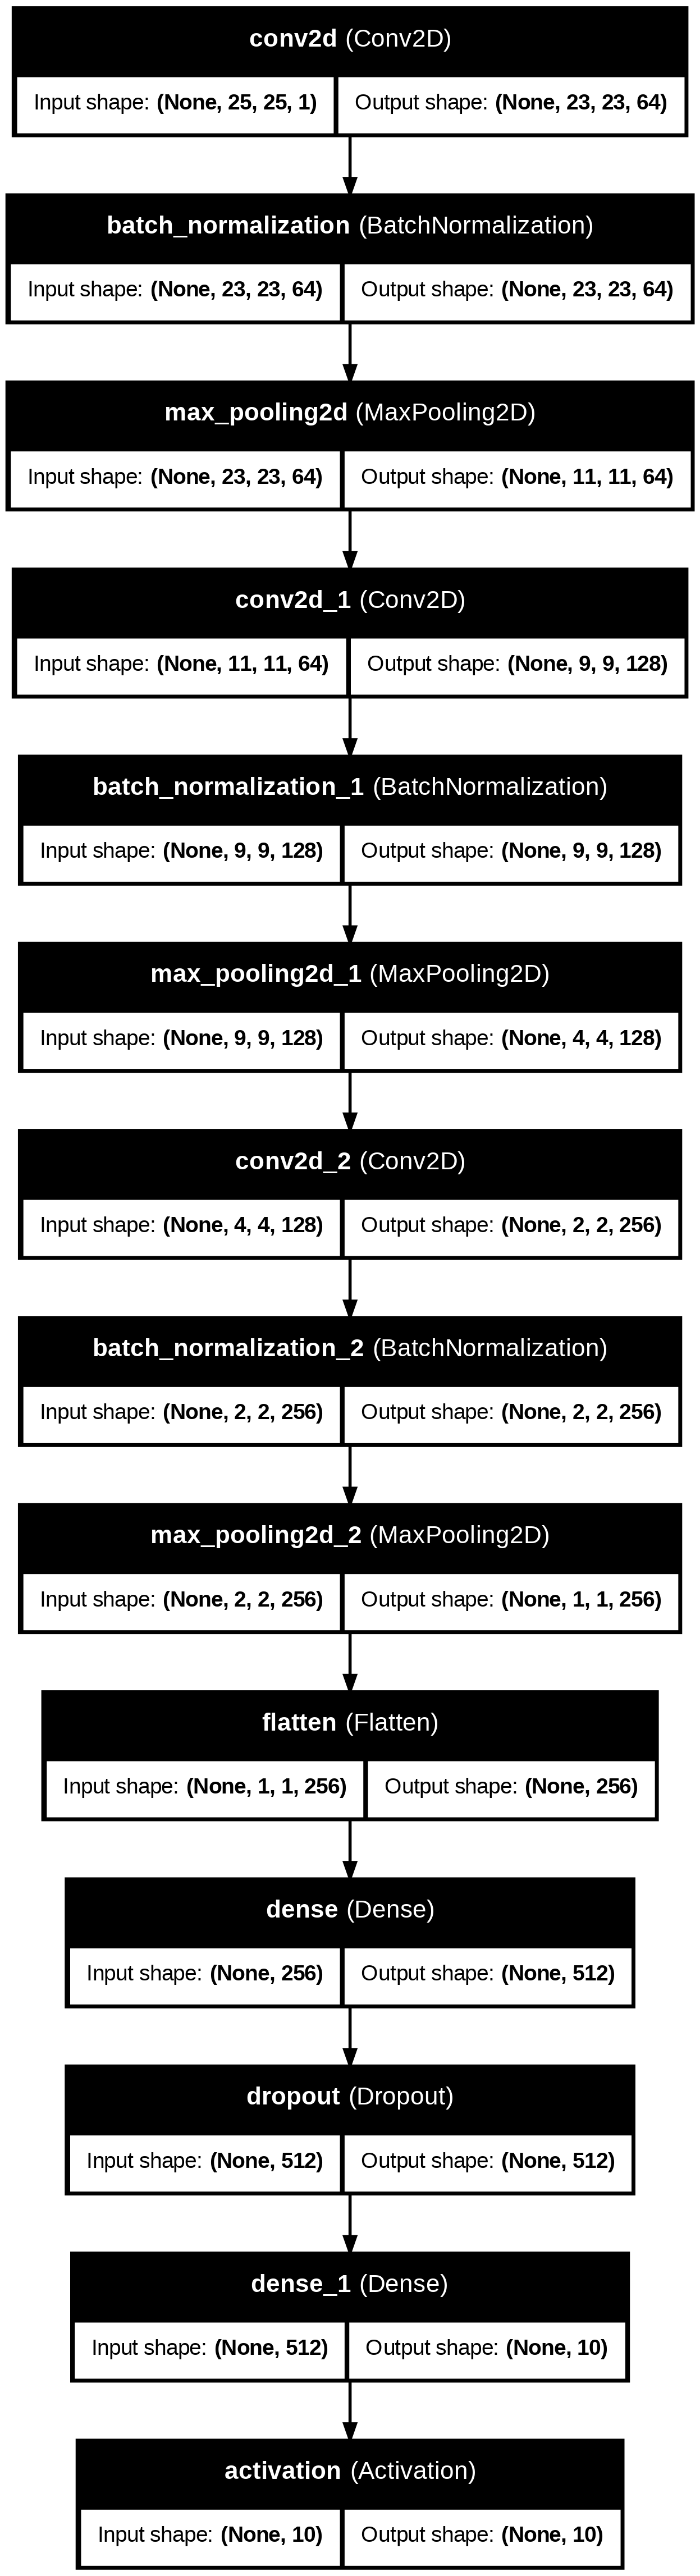

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.utils import plot_model

# Définir le modèle
model = Sequential()
model.add(Input(shape=(25, 25, 1)))  # Input layer with shape (28, 28, 1)
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))  # Conv2D layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))  # MaxPooling2D layer

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))  # Another Conv2D layer with more filters
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))  # Another MaxPooling2D layer

model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))  # Yet another Conv2D layer with more filters
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))  # Another MaxPooling2D layer

model.add(Flatten())  # Flatten the output to feed into a Dense layer

model.add(Dense(units=512, activation='relu'))  # Dense layer with more units
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(units=10))  # Output layer for classification
model.add(Activation('softmax'))  # Softmax activation for the output layer

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

# Plot model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


## Train model

## Training and Evaluating the CNN Model

This section of the code handles the training and evaluation of the Convolutional Neural Network (CNN) model.

1. **Train the model**:
    - The `fit` method is used to train the model on the training data (`x_train` and `y_train`) for 40 epochs.
    - The validation data (`x_test` and `y_test`) is used to evaluate the model's performance after each epoch.
    
    ```python
    model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))
    ```

2. **Evaluate the model**:
    - The `evaluate` method is used to assess the model's performance on the test data.
    - The test loss and test accuracy are calculated and displayed.
    
    ```python
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'Test accuracy: {test_acc:.2f}')
    ```

### Detailed Steps:

- **Training**:
  - The `fit` function trains the model for a specified number of epochs. In this case, the model is trained for 40 epochs. During training, the model learns to minimize the loss function using the Adam optimizer.
  - `x_train` and `y_train` are the input data and corresponding labels used for training.
  - `x_test` and `y_test` are used as validation data to monitor the model's performance on unseen data during training.
  
- **Evaluation**:
  - The `evaluate` function measures the model's performance on the test data (`x_test` and `y_test`).
  - It returns the test loss and test accuracy, which provide insight into how well the model generalizes to new data.
  - The test accuracy is printed to show the final performance of the model.

By following these steps, you can train a CNN model on your dataset and evaluate its performance on a separate test set to ensure it generalizes well to new data.


In [7]:
model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

# Évaluer le modèle
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

Epoch 1/40
475/475 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7763 - loss: 0.7104 - val_accuracy: 0.8492 - val_loss: 0.4566
Epoch 2/40
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9532 - loss: 0.1466 - val_accuracy: 0.9742 - val_loss: 0.0982
Epoch 3/40
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0935 - val_accuracy: 0.9750 - val_loss: 0.0980
Epoch 4/40
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0756 - val_accuracy: 0.9763 - val_loss: 0.0741
Epoch 5/40
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9835 - loss: 0.0528 - val_accuracy: 0.9792 - val_loss: 0.0738
Epoch 6/40
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9832 - loss: 0.0594 - val_accuracy: 0.9608 - val_loss: 0.1303
Epoch 7/40
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0481 - val_accuracy: 0.9747 - val_loss: 0.0865
Epoch 8/40
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0475 - val_accuracy: 

## Evaluate model

## Model Evaluation and Confusion Matrix Generation

This section of the code evaluates the trained model and generates a confusion matrix to visualize the model's performance.


1. **Evaluate the model and make predictions**:
    - The `evaluate` method is used to assess the model's performance on the test data.
    - The `predict` method is used to generate predictions for the test data.
    
    ```python
    model.evaluate(x_test, y_test, verbose=2)
    pred_test = model.predict(x_test)
    ```

2. **Generate the confusion matrix**:
    - The `confusion_matrix` function from `sklearn.metrics` is used to create a confusion matrix based on the true labels and predicted labels.
    
    ```python
    conf_matrix = confusion_matrix(y_test.argmax(axis=1), pred_test.argmax(axis=1))
    ```

3. **Visualize the confusion matrix**:
    - A heatmap of the confusion matrix is created using `seaborn` to visualize the number of correct and incorrect predictions for each class.
    
    ```python
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    ```



By following these steps, you can evaluate your model's performance on the test data and visualize the results using a confusion matrix.


119/119 - 0s - 2ms/step - accuracy: 0.9861 - loss: 0.1076
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


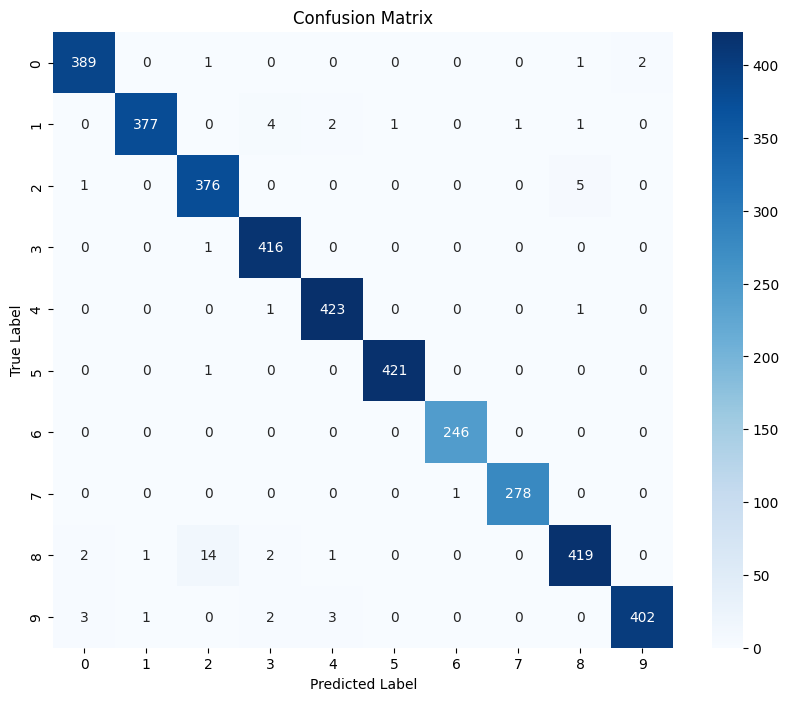

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Évaluation du modèle et prédiction
model.evaluate(x_test, y_test, verbose=2)
pred_test = model.predict(x_test)

# Génération de la matrice de confusion
conf_matrix = confusion_matrix(y_test.argmax(axis=1), pred_test.argmax(axis=1))

# Affichage de la matrice de confusion en couleur
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Save trained model

In [17]:
model.save('project.h5')

## Manual Testing of the CNN Model

This section of the code is designed to manually test the trained Convolutional Neural Network (CNN) model by loading an image, preprocessing it, making a prediction, and displaying the results.

1. **Load the trained model**:
    - The trained model is loaded from a file named `'project.h5'`.

    ```python
    model = load_model('project.h5')
    ```

2. **Define the image preprocessing function**:
    - **Resize**: Resize the image to 25x25 pixels.
    - **Convert to grayscale**: Change the image to grayscale.
    - **Normalize**: Normalize the pixel values.
    - **Apply Gaussian filter**: Reduce noise by applying a Gaussian blur.
    - **Edge detection**: Detect edges using the Canny algorithm.
    - **Binarization**: Convert the image to a binary format using Otsu's thresholding.
    - **Dilation and Erosion**: Perform dilation and erosion to improve image quality for prediction.

   

3. **Define the prediction and saving function**:
    - **Load the image**: Load the image from the specified path.
    - **Preprocess the image**: Apply preprocessing to the image.
    - **Display the images**: Show the original image, preprocessed image, and the result of the prediction.
    - **Normalize and reshape**: Prepare the image for prediction.
    - **Predict**: Use the model to make a prediction.
    - **Save**: Save the preprocessed image.
    - **Display results**: Show the predicted digit and confidence on the processed image.

    

4. **Upload and test images**:
    - **Upload images**: Upload images using Google Colab’s file upload functionality.
    - **Process and predict**: Apply the prediction function to each uploaded image and display results.

    ```python
    # Télécharger les fichiers d'image
    uploaded = files.upload()

    # Tester les images téléchargées
    for idx, image_name in enumerate(uploaded.keys()):
        output_path = f"/content/processed_image_{idx}.png"  # Chemin de sortie pour chaque image traitée
        predicted_digit, confidence = predict_and_save(image_name, output_path)
        if predicted_digit is not None:
            print(f"Image {idx+1} - Predicted Digit:", predicted_digit)
            print(f"Image {idx+1} - Confidence:", confidence)
    ```

### Summary

This code allows for manual testing of the CNN model by preprocessing images, making predictions, and displaying both the results and visualizations. It facilitates evaluation of how well the model performs with new images and helps in verifying the model's accuracy in practical scenarios.


Saving IMG_8922.jpg to IMG_8922.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
Processed image saved at: /content/processed_image_0.png


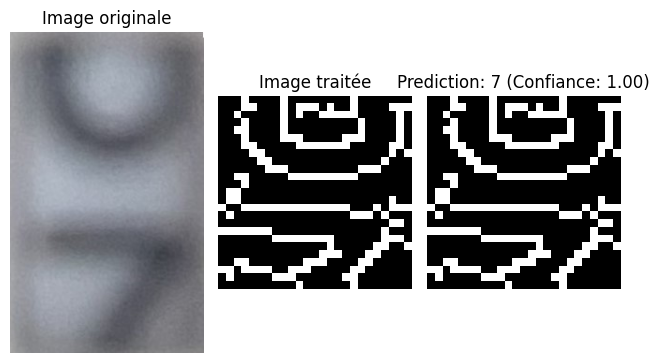

Image 1 - Predicted Digit: 7
Image 1 - Confidence: 1.0


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files

# Charger votre modèle
model = load_model('project.h5')

def preprocess_image(img, img_size=(25, 25)):
    # Redimensionner l'image
    img = cv2.resize(img, img_size)

    # Conversion en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalisation
    normalized = gray / 255.0

    # Filtrage Gaussien
    blurred = cv2.GaussianBlur(normalized, (5, 5), 0)

    # Convertir en 8 bits pour Canny
    blurred_8u = np.uint8(blurred * 255)

    # Détection des contours
    edges = cv2.Canny(blurred_8u, threshold1=30, threshold2=100)

    # Binarisation
    _, thresholded = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Expansion (dilatation)
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(thresholded, kernel, iterations=1)

    # Érosion
    eroded = cv2.erode(dilated, kernel, iterations=1)

    return thresholded

def predict_and_save(image_path, output_path):
    # Charger l'image en couleur
    img = cv2.imread(image_path)

    # Vérifier si l'image a été chargée correctement
    if img is None:
        print(f"Erreur: l'image à {image_path} n'a pas pu être chargée.")
        return None, None

    # Appliquer le prétraitement
    img_processed = preprocess_image(img, img_size=(25, 25))

    # Afficher l'image originale
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Image originale')
    plt.axis('off')

    # Afficher l'image en niveaux de gris après traitement
    plt.subplot(1, 3, 2)
    plt.imshow(img_processed, cmap='gray')
    plt.title('Image traitée')
    plt.axis('off')

    # Normaliser l'image
    img_normalized = img_processed.astype('float32') / 255.0
    # Remodeler l'image pour correspondre à la forme d'entrée du modèle
    img_reshaped = img_normalized.reshape((1, 25, 25, 1))
    # Faire la prédiction
    prediction = model.predict(img_reshaped)
    # Obtenir le chiffre prédit
    predicted_digit = np.argmax(prediction)
    # Obtenir l'indice de confiance
    confidence = np.max(prediction)

    # Enregistrer l'image traitée
    save_path = output_path
    cv2.imwrite(save_path, img_processed)
    print(f"Processed image saved at: {save_path}")

    # Afficher l'image traitée avec la prédiction
    plt.subplot(1, 3, 3)
    plt.imshow(img_processed, cmap='gray')
    plt.title(f'Prediction: {predicted_digit} (Confiance: {confidence:.2f})')
    plt.axis('off')

    # Afficher toutes les images
    plt.tight_layout()
    plt.show()

    return predicted_digit, confidence

# Télécharger les fichiers d'image
uploaded = files.upload()

# Tester les images téléchargées
for idx, image_name in enumerate(uploaded.keys()):
    output_path = f"/content/processed_image_{idx}.png"  # Chemin de sortie pour chaque image traitée
    predicted_digit, confidence = predict_and_save(image_name, output_path)
    if predicted_digit is not None:
        print(f"Image {idx+1} - Predicted Digit:", predicted_digit)
        print(f"Image {idx+1} - Confidence:", confidence)


## Removing Softmax Layer from the Model

This code snippet demonstrates how to remove the Softmax activation layer from a Keras model. This can be useful when preparing a model for deployment, such as on an ESP32 CAM, where you might want to work with raw logits instead of probabilities.

1. **Identify the Last Layer**:
    - Determine if the last layer of the model is an `Activation` layer with a Softmax activation. If so, find the name of the previous layer.

    ```python
    from tensorflow.keras.activations import softmax
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Activation

    # Identifiez le nom de la dernière couche réelle
    last_layer_name = model.layers[-1].name if not isinstance(model.layers[-1], Activation) else model.layers[-2].name
    ```

2. **Remove Softmax Layer**:
    - Check if the last layer is a Softmax activation. If it is, create a new model without the Softmax layer, using the previous layer's output. If not, print an error message.

    ```python
    if isinstance(model.layers[-1], Activation) and model.layers[-1].activation == softmax:
        model = tf.keras.models.Model(inputs=model.inputs, outputs=model.get_layer(last_layer_name).output, name=model.name)
    else:
        print('Error: last layer is not SoftMax Activation')
    ```

### Summary

This code removes the Softmax activation layer from a Keras model. It identifies the last layer and checks if it's a Softmax activation. If so, it creates a new model that omits this layer, keeping the output from the previous layer. This approach is useful for deploying models on devices where raw logits are needed, such as the ESP32 CAM.


In [13]:
from tensorflow.keras.activations import softmax
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation


# Identifiez le nom de la dernière couche réelle
last_layer_name = model.layers[-1].name if not isinstance(model.layers[-1], Activation) else model.layers[-2].name

if isinstance(model.layers[-1], Activation) and model.layers[-1].activation == softmax:
    model = tf.keras.models.Model(inputs=model.inputs, outputs=model.get_layer(last_layer_name).output, name=model.name)
else:
    print('Error: last layer is not SoftMax Activation')


## Converting a Keras Model to a C++ Representation

This code demonstrates how to convert a Keras model into a C++ representation using the `qualia_codegen_core` library. This process is useful for deploying models on platforms where C++ code is required.

1. **Install and Import Libraries**:
    - Install the `qualia_codegen_core` package and import the necessary modules.

    ```python
    %pip install qualia_codegen_core
    import qualia_codegen_core
    from qualia_codegen_core.graph.KerasModelGraph import KerasModelGraph
    from qualia_codegen_core.graph.Quantization import Quantization
    from qualia_codegen_core.graph.RoundMode import RoundMode
    ```

2. **Obtain Path to C++ Main File**:
    - Retrieve the path to a C++ `main.cpp` file from the `qualia_codegen_core.examples` package. This file might be used for model deployment or testing.

    ```python
    from importlib.resources import files
    main_path = str((files('qualia_codegen_core.examples')/'Linux'/'main.cpp').resolve())
    ```

3. **Convert Keras Model to C++ Graph**:
    - Convert the Keras model into a `KerasModelGraph` object. This object represents the model as a graph, which can then be used for further processing or deployment.

    ```python
    modelgraph = KerasModelGraph(model).convert()
    ```

4. **Display Model Graph Information**:
    - Print the `modelgraph` object and its nodes. This provides insight into the structure and components of the converted model graph.

    ```python
    print(modelgraph)
    print(modelgraph.nodes)  # Affiche les nœuds du modèle
    ```

### Summary

This code converts a Keras model into a C++ representation using the `qualia_codegen_core` library. It installs the necessary package, retrieves a C++ file path, converts the Keras model into a graph, and prints the graph's details. This conversion is useful for deploying models on platforms that use C++.


In [18]:
%pip install qualia_codegen_core
import qualia_codegen_core
from qualia_codegen_core.graph.KerasModelGraph import KerasModelGraph
from qualia_codegen_core.graph.Quantization import Quantization
from qualia_codegen_core.graph.RoundMode import RoundMode

from importlib.resources import files
main_path = str((files('qualia_codegen_core.examples')/'Linux'/'main.cpp').resolve())

modelgraph = KerasModelGraph(model).convert()
print(modelgraph)
print(modelgraph.nodes)  # Affiche les nœuds du modèle


—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
Inputs                                           | Layer                                            | Outputs                                          | Input shape                                      | Output shape                                    
—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
                                                 | input_layer                                      | conv2d                                           | (1, 25, 25, 1)                                   | ((1, 25, 25, 1),)                  

## Quantizing and Converting a Keras Model to Floating-Point C++ Representation

This code snippet demonstrates how to apply quantization annotations to a Keras model graph and convert it into a floating-point C++ representation.

1. **Deep Copy of Model Graph**:
    - Create a deep copy of the `modelgraph` object to ensure that any modifications are made to a separate instance, preserving the original model graph.

    ```python
    float_modelgraph = copy.deepcopy(modelgraph)
    ```

2. **Apply Layer Quantization Annotations**:
    - Iterate through each node in the model graph and apply quantization annotations for floating-point representation with 32-bit precision. This includes specifying scale factors and rounding modes.

    ```python
    # Layer quantization annotations for float32
    for node in float_modelgraph.nodes:
        # No scale factor if not fixed-point quantization on integers
        node.q = Quantization(
                number_type=float,
                width=32,
                long_width=32,
                weights_scale_factor=0,
                output_scale_factor=0,
                weights_round_mode=RoundMode.NONE,
                output_round_mode=RoundMode.NONE,
                )
    ```

3. **Print Quantized Model Graph**:
    - Print the updated model graph to review the applied quantization annotations and ensure that the modifications are correct.

    ```python
    print(float_modelgraph)
    ```

4. **Convert Model to C++ Representation**:
    - Use the `qualia_codegen_core.Converter` to convert the quantized model graph into a C++ representation, specifying the output path where the C++ code will be saved.

    ```python
    float_res = qualia_codegen_core.Converter(output_path=Path('gsc_output_floating')).convert_model(float_modelgraph)
    ```

5. **Save the Converted Model**:
    - Write the converted C++ code to a header file named `gsc_model_floating.h`.

    ```python
    with open('gsc_model_floating.h', 'w') as f:
        f.write(float_res)
    ```

### Summary

This code applies quantization annotations to a Keras model graph for floating-point precision and converts the modified model graph into a C++ representation. It deep-copies the model graph, applies quantization, prints the updated graph, converts it to C++ code, and saves the result to a header file.


In [16]:
float_modelgraph = copy.deepcopy(modelgraph)


# layer quantization annotations for float32
for node in float_modelgraph.nodes:
    # No scale factor if not fixed-point quantization on integers
    node.q = Quantization(
            number_type=float,
            width=32,
            long_width=32,
            weights_scale_factor=0,
            output_scale_factor=0,
            weights_round_mode=RoundMode.NONE,
            output_round_mode=RoundMode.NONE,
            )
print(float_modelgraph)

float_res = qualia_codegen_core.Converter(output_path=Path('gsc_output_floating')).convert_model(float_modelgraph)

with open('gsc_model_floating.h', 'w') as f:
    f.write(float_res)

—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
Inputs                                           | Layer                                            | Outputs                                          | Input shape                                      | Output shape                                    
—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
                                                 | input_layer                                      | conv2d                                           | (1, 25, 25, 1)                                   | ((1, 25, 25, 1),)                  

## Compile C++ Code for Quantized Model

This command compiles the C++ code for the quantized model using `g++` with various flags to ensure optimal performance and strict compliance with C++ standards.

```bash
!g++ -std=c++17 -Wall -pedantic -Ofast -o gsc_fixed -include gsc_output_floating/include/defines.h -Igsc_output_floating/include gsc_output_floating/model.c {main_path}


In [19]:
!g++ -std=c++17 -Wall -pedantic -Ofast -o gsc_fixed -include gsc_output_floating/include/defines.h -Igsc_output_floating/include gsc_output_floating/model.c {main_path}

In [ ]:
fixed_modelgraph = copy.deepcopy(modelgraph)

# layer quantization annotations for int16 Q9.7
for node in fixed_modelgraph.nodes:
    node.q = Quantization(
            number_type=int,
            width=16,
            long_width=32,
            weights_scale_factor=7,
            output_scale_factor=7,
            weights_round_mode=RoundMode.FLOOR,
            output_round_mode=RoundMode.FLOOR,
            )

fixed_res = qualia_codegen_core.Converter(output_path=Path('gsc_output_fixed')).convert_model(fixed_modelgraph)

with open('gsc_model_fixed.h', 'w') as f:
    f.write(fixed_res)

In [ ]:
!g++ -std=c++17 -Wall -Wextra -pedantic -Ofast -o gsc_fixed -include gsc_output_fixed/include/defines.h -Igsc_output_fixed/include gsc_output_fixed/model.c {main_path}
